In [2]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

result_dir = "H:/JHMDB/models"

# all models

In [6]:
results = {}
for m in os.listdir(f"{result_dir}"):

    print(m)

    max_acc = 0
    max_train_acc = 0

    for e in tqdm(os.listdir(f"{result_dir}/{m}")):

        if e == 'model': continue

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])
        train_acc = accuracy_score(res['train_actual'], res['train_predicted'])

        if acc > max_acc: max_acc = acc
        if train_acc > max_train_acc: max_train_acc = train_acc

    results[m] = max_acc

    print(max_acc)
    print(max_train_acc)

sorted = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in sorted.keys():
    print(f"{k} - {sorted[k]}")

m_4.4


100%|██████████| 85/85 [00:01<00:00, 53.31it/s]


0.17164179104477612
0.6666666666666666
m_4.6


100%|██████████| 101/101 [00:01<00:00, 55.28it/s]


0.19402985074626866
0.8598484848484849
m_4.7


100%|██████████| 76/76 [00:01<00:00, 53.29it/s]


0.09328358208955224
0.16818181818181818
m_4.8


100%|██████████| 301/301 [00:05<00:00, 56.48it/s]


0.17537313432835822
0.7181818181818181
m_4.9


100%|██████████| 301/301 [00:04<00:00, 68.05it/s]


0.1791044776119403
0.9181818181818182
m_4.10


100%|██████████| 301/301 [00:05<00:00, 55.39it/s]


0.14925373134328357
0.5583333333333333
m_4.11


100%|██████████| 301/301 [00:06<00:00, 43.24it/s]


0.16044776119402984
0.6272727272727273
m_4.9.2


100%|██████████| 300/300 [00:05<00:00, 55.79it/s]


0.17537313432835822
0.7643939393939394
m_4.9.3


100%|██████████| 174/174 [00:02<00:00, 70.76it/s]

0.22014925373134328
0.9363636363636364
m_4.7 - 0.09328358208955224
m_4.10 - 0.14925373134328357
m_4.11 - 0.16044776119402984
m_4.4 - 0.17164179104477612
m_4.8 - 0.17537313432835822
m_4.9.2 - 0.17537313432835822
m_4.9 - 0.1791044776119403
m_4.6 - 0.19402985074626866
m_4.9.3 - 0.22014925373134328


# one model

In [16]:
#Change this to the version you want
VERSION = "4.9.4"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

for e in tqdm(os.listdir(model_path)):

    if e == 'model' : continue

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

100%|██████████| 301/301 [00:03<00:00, 77.06it/s]


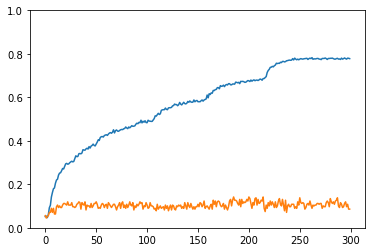

In [17]:
plt.ylim(0,1)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [18]:
max(testing_accs)

0.1417910447761194